# INTRODUCTION

| ID       | Fullname            |
|----------|---------------------|
| 19127399 | Huỳnh Cao Nhật Hiếu |
| 19127444 | Ngô Đăng Khoa       | 

# LIBRARY

In [370]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Add addition library
pd.options.display.max_columns = None

# PREPROCESSING DATA

## *Read Data*

In [371]:
# Load Data that I will investigate it
df_match = pd.read_csv('Match.csv')
df_player_attribute = pd.read_csv('Player_Attributes.csv')
df_team_attribute = pd.read_csv('Team_Attributes.csv')
df_team = pd.read_csv('Team.csv')
df_player = pd.read_csv('Player.csv')
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')

# Exploring Data

## df_match

In [372]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

- This match dataframe recorded all European football matches from season 2008/2009 to season 2015/16
- This dataframe has 25979 rows and 115 columns
- Each row is a match record 
- Check duplicate rows:

In [373]:
len(df_match.drop_duplicates()) == len(df_match)

True

There is no duplicate rows in this dataframe

### Meaning of each columns:

- **id**: ID of each match
- **country_id**: ID of country where a match takes place, this is a foreign key to Country.csv
- **league_id**: ID of league where a match belongs to, this is a foreign key to League.csv
- **stage**: 
- **date**: Date of a match occurs
- **match_api_id**: match id get from the API
- **home_team_api_id**: Home team id, this a foreign key to Team.csv
- **away_team_api_id**: Away team id, this a foreign key to Team.csv
- **home_team_goal**: Goal scored for the home team
- **away_team_goal**: Goal scored for the away team
- **home_playerXi, home_playerYi**: Home team line up with squad formation (X, Y coordinates)
- **away_playerXi, away_playerYi**: away team line up with squad formation (X, Y coordinates)
- **home_playeri, away_playeri**: Player id of both team, this is a foreign key in Player.csv
- **goal, shoton, shotoff, foulcommit, card, cross, corner, possession**: Stats in a football match
- **Remain columns**: Bet odds of each betting companies, these columns will be described detail in **GIVE THE QUESTION** 
	

### Data types of each columns


In [374]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


### Numerical columns

In [375]:
Numerical = ['home_team_goal', 'away_team_goal','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA','IWH','IWD','IWA', 'LBH', 'LBD', 'LBA','PSH','PSD','PSA',
                    'WHH','WHD','WHA','SJH','SJD','SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
Categorical = ['id', 'country_id','league_id', 'season', 'stage', 'date',	'match_api_id',	'home_team_api_id',	'away_team_api_id',	]
df_match[Numerical]

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


percentage of missing values:

In [376]:
df_match.isna().sum()*100 / len(df_match)

id             0.000000
country_id     0.000000
league_id      0.000000
season         0.000000
stage          0.000000
                ...    
GBD           45.486739
GBA           45.486739
BSH           45.490589
BSD           45.490589
BSA           45.490589
Length: 115, dtype: float64

In [377]:
df_match[Numerical].agg(['max', 'min'])

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
max,10,9,26.00,17.0,51.00,34.00,19.50,51.0,20.00,11.0,25.0,26.00,19.0,51.0,36.00,29.0,47.50,26.00,17.00,51.00,23.00,15.0,41.0,36.00,26.00,67.00,21.00,11.00,34.00,17.00,13.00,34.00
min,0,0,1.04,1.4,1.08,1.03,1.65,1.1,1.03,1.5,1.1,1.04,1.4,1.1,1.04,2.2,1.09,1.02,1.02,1.08,1.04,1.4,1.1,1.03,1.62,1.08,1.05,1.45,1.12,1.04,1.33,1.12


### Categorical columns

In [378]:
df_match[Categorical]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985
...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243


In [379]:
df_match[Categorical].agg(['max', 'min'])

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id
max,25979,24558,24558,2015/2016,38,2016-05-25 00:00:00,2216672,274581,274581
min,1,1,1,2008/2009,1,2008-07-18 00:00:00,483129,1601,1601


## df_player_attribute

In [380]:
df_player_attribute

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


- This dataframe has 183,978 rows and 42 columns
- Each row describe stats, attributes of each player in many seasons
- Check duplicate rows: 

In [381]:
len(df_player_attribute.drop_duplicates()) - len(df_player_attribute)

0

### Meaning each of each column:

- **id**: id of each player in a season
- **player_fifa_api_id**: id from fifa api
- **player_api_id**: id from other api
- **date**: Update date of a player
- **overall_ratings**: Overall ratings from fifa
- **potential**: Maximum overall rating of a player in a season
- **preferred_foot**: preferred foot of a player
- **attacking_work_rate**: attacking_work_rate of a player
- **defensive_work_rate**: defensive_work_rate of a player
- **remain columns**: All stats of a player in fifa

### Datatypes:

In [382]:
df_player_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

### Numerical and categoricals columns

In [383]:
Numerical = ['overall_rating',	'potential', 'preferred_foot',	'attacking_work_rate',	'defensive_work_rate',	'crossing',	'finishing', 
            'heading_accuracy',	'short_passing', 'volleys',	'dribbling', 'curve',	'free_kick_accuracy', 'long_passing',	
            'ball_control',	'acceleration',	'sprint_speed',	'agility',	'reactions','balance',	'shot_power',	'jumping',	
            'stamina',	'strength',	'long_shots',	'aggression',	'interceptions','positioning',	'vision','penalties',	
            'marking',	'standing_tackle',	'sliding_tackle',	'gk_diving',	'gk_handling',	'gk_kicking',	'gk_positioning','gk_reflexes']
Categorical = ['date', 'player_fifa_api_id', 'player_api_id']

percentage of missing values: 

In [384]:
df_player_attribute.isna().sum()*100 / len(df_player_attribute)

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

In [385]:
df_player_attribute[Numerical]

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [386]:
df_player_attribute[Categorical]

,date,player_fifa_api_id,player_api_id
0,2016-02-18 00:00:00,218353,505942
1,2015-11-19 00:00:00,218353,505942
2,2015-09-21 00:00:00,218353,505942
3,2015-03-20 00:00:00,218353,505942
4,2007-02-22 00:00:00,218353,505942
...,...,...,...
183973,2009-08-30 00:00:00,102359,39902
183974,2009-02-22 00:00:00,102359,39902
183975,2008-08-30 00:00:00,102359,39902
183976,2007-08-30 00:00:00,102359,39902


In [387]:
df_player_attribute[Numerical].agg(['max','min'])

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
max,94.0,97.0,95.0,97.0,98.0,97.0,93.0,97.0,94.0,97.0,97.0,97.0,97.0,97.0,96.0,96.0,96.0,97.0,96.0,96.0,96.0,96.0,97.0,96.0,96.0,97.0,96.0,96.0,95.0,95.0,94.0,93.0,97.0,96.0,96.0
min,33.0,39.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,3.0,5.0,10.0,12.0,11.0,17.0,12.0,2.0,14.0,10.0,10.0,1.0,6.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


In [388]:
df_player_attribute[Categorical].agg(['max','min'])

,date,player_fifa_api_id,player_api_id
max,2016-07-07 00:00:00,234141,750584
min,2007-02-22 00:00:00,2,2625


## df_team_attribute

In [389]:
df_team_attribute

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


- This dataframe has 1458 rows and 25 columns
- Each row describe stats and team's attributes in a season
- Check duplicate rows:

In [390]:
len(df_team_attribute.drop_duplicates()) - len(df_team_attribute)

0

### Meaning of each column:

- **id**: id for a team in a season
- **team_fifa_api_id**: id of a team in fifa_api
- **team_api_id**: id from other api
- **date**: Update date of a team
- **remain columns**: stats for defence and attack styles of a team

### Data types

In [391]:
df_team_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

### Numerical and Categorical columns

In [392]:
Numerical = ['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
'defencePressure', 'defenceAggression', 'defenceTeamWidth']
Categorical = ['id', 'team_fifa_api_id','team_api_id', 'date', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassingClass',
'buildUpPlayPositioningClass', 'chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass', 'chanceCreationPositioningClass',
'defencePressureClass', 'defenceAggressionClass','defenceTeamWidthClass', 'defenceDefenderLineClass']

percentage of missing value:

In [393]:
df_team_attribute.isna().sum()*100 / len(df_team_attribute)

id                                 0.000000
team_fifa_api_id                   0.000000
team_api_id                        0.000000
date                               0.000000
buildUpPlaySpeed                   0.000000
buildUpPlaySpeedClass              0.000000
buildUpPlayDribbling              66.460905
buildUpPlayDribblingClass          0.000000
buildUpPlayPassing                 0.000000
buildUpPlayPassingClass            0.000000
buildUpPlayPositioningClass        0.000000
chanceCreationPassing              0.000000
chanceCreationPassingClass         0.000000
chanceCreationCrossing             0.000000
chanceCreationCrossingClass        0.000000
chanceCreationShooting             0.000000
chanceCreationShootingClass        0.000000
chanceCreationPositioningClass     0.000000
defencePressure                    0.000000
defencePressureClass               0.000000
defenceAggression                  0.000000
defenceAggressionClass             0.000000
defenceTeamWidth                

In [394]:
df_team_attribute[Numerical]

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,60,NaN,50,60,65,55,50,55,45
1,52,48.0,56,54,63,64,47,44,54
2,47,41.0,54,54,63,64,47,44,54
3,70,NaN,70,70,70,70,60,70,70
4,47,NaN,52,53,48,52,47,47,52
...,...,...,...,...,...,...,...,...,...
1453,52,NaN,52,52,48,53,46,48,53
1454,54,NaN,51,47,52,50,44,55,53
1455,54,NaN,51,47,52,32,44,58,37
1456,54,42.0,51,47,52,32,44,58,37


In [395]:
df_team_attribute[Numerical].agg(['max', 'min'])

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
max,80,77.0,80,80,80,80,72,72,73
min,20,24.0,20,21,20,22,23,24,29


In [396]:
df_team_attribute[Categorical]

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,Fast,Little,Long,Organised,Risky,Lots,Lots,Organised,Medium,Double,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,Balanced,Normal,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover


In [397]:
df_team_attribute[Categorical].agg(['max', 'min'])

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
max,1458,112513,274581,2015-09-10 00:00:00,Slow,Normal,Short,Organised,Safe,Normal,Normal,Organised,Medium,Press,Wide,Offside Trap
min,1,1,1601,2010-02-22 00:00:00,Balanced,Little,Long,Free Form,Normal,Little,Little,Free Form,Deep,Contain,Narrow,Cover


## df_country

In [398]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


- This dataframe has 2 columns and 11 rows
- Each rows is a country
- There are no duplicate rows in this dataframe

### Meaning of each columns:

- **id**: id for each country
- **name**: names of countries

### Data type

In [399]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


## df_league

In [400]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


- This dataframe has 11 rows and 3 columns
- Each rows is a football league
- There is no duplicate rows in this dataframe

### Meaning of each columns:

- **id**: id for leagues
- **country_id**: Country of a league
- **name**: League's names

### Data types:

In [401]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


## df_player

In [402]:
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


- This dataframe has 11,060 rows and 7 columns
- Each column is the information for a player
- Check duplicate rows: 

In [403]:
len(df_player.drop_duplicates()) - len(df_player)

0

### Data types

In [404]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


### Meaning of each column

- **id**: id for each player
- **player_api_id**: id from api
- **player_fifa_api_id**: id from fifa api
- **player_name**: names of football players
- **birthday**: Date of birt of a player
- **height**: height of a player (cm)
- **weight**: weight of a player (pound)

### Numerical and categorical  

In [405]:
Numerical = ['weight', 'height']
Categorical = ['id','player_api_id', 'player_name', 'player_fifa_api_id', 'birthday']

percentage of missing value

In [406]:
df_player.isna().sum()*100 / len(df_player)

id                    0.0
player_api_id         0.0
player_name           0.0
player_fifa_api_id    0.0
birthday              0.0
height                0.0
weight                0.0
dtype: float64

In [407]:
df_player[Numerical]

,weight,height
0,187,182.88
1,146,170.18
2,163,170.18
3,198,182.88
4,154,182.88
...,...,...
11055,168,182.88
11056,176,182.88
11057,154,180.34
11058,172,185.42


In [408]:
df_player[Numerical].agg(['max', 'min'])

,weight,height
max,243,208.28
min,117,157.48


In [409]:
df_player[Categorical]

,id,player_api_id,player_name,player_fifa_api_id,birthday
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00
...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00


In [410]:
df_player[Categorical].agg(['max', 'min'])

,id,player_api_id,player_name,player_fifa_api_id,birthday
max,11075,750584,dos Santos Fabio Junior,234141,1999-04-24 00:00:00
min,1,2625,Aaron Appindangoye,2,1967-01-23 00:00:00


## df_team

In [411]:
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


- This dataframe has 299 rows and 5 columns
- Each row is a team
- Check duplicate rows:

In [412]:
len(df_team.drop_duplicates()) - len(df_team)

0

### Data types

In [413]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


### Meaning of each column

- **id**: id of a team
- **team_api_id**: id of a team from api
- **team_fifa_api_id**: id of a team from fifa api
- **team_long_name**: Full name of a team
- **team_short_name**: Short name of a team

### All of columns in this dataframe are categorical

In [414]:
df_team.agg(['max', 'min'])

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
max,51606,274581,112513.0,Śląsk Wrocław,ZWO
min,1,1601,1.0,1. FC Kaiserslautern,AAR


# GIVE THE QUESTION

## 1.  Phân tích lối chơi các đội trong team Attributes

## 2. Analyze Betting companies

### What are benefits of finding the answer?
Find out win rate of betting companies to help you realize that they always win and stay away from betting if you do not want to lose your family :DDDDDD

### Exploring data
We will anwser this question using data from df_match

#### Odds of betting companies  df_match:
* B365H = Bet365 home win odds
* B365D = Bet365 draw odds
* B365A = Bet365 away win odds
* BWH = Bet&Win home win odds
* BWD = Bet&Win draw odds
* BWA = Bet&Win away win odds
* IWH = Interwetten home win odds
* IWD = Interwetten draw odds
* IWA = Interwetten away win odds
* LBH = Ladbrokes home win odds
* LBD = Ladbrokes draw odds
* LBA = Ladbrokes away win odds
* PSH = Pinnacle home win odds
* PSD = Pinnacle draw odds
* PSA = Pinnacle away win odds
* WHH = William Hill home win odds
* WHD = William Hill draw odds
* WHA = William Hill away win odds
* SJH = Stan James home win odds
* SJD = Stan James draw odds
* SJA = Stan James away win odds
* VCH = VC Bet home win odds
* VCD = VC Bet draw odds
* VCA = VC Bet away win odds
* GBH = Gamebookers home win odds
* GBD = Gamebookers draw odds
* GBA = Gamebookers away win odds
* BSH = Blue Square home win odds
* BSD = Blue Square draw odds
* BSA = Blue Square away win odds

Betting companies Dataset:

In [415]:
companies = pd.DataFrame({'Short name': ['B365','BW','IW','LB','PS','WH','SJ', 'VC', 'GB','BS'],
                        'Company name': ['Bet365', 'Bet&Win','Interwetten','Ladbrokes', 'Pinnacle','William Hill','Stan James','VC Bet', 
                        'Gamebookers', 'Blue Square ']})
companies

,Short name,Company name
0,B365,Bet365
1,BW,Bet&Win
2,IW,Interwetten
3,LB,Ladbrokes
4,PS,Pinnacle
5,WH,William Hill
6,SJ,Stan James
7,VC,VC Bet
8,GB,Gamebookers
9,BS,Blue Square


### Preprocess data

First we drop unnecessary columns like match stats or players, we just care about the results, odds and general informations of a match.

In [416]:
pd.options.display.max_columns = None
df_match = df_match[['id', 'country_id', 'league_id','season', 'home_team_goal',
                    'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA','IWH','IWD','IWA', 'LBH', 'LBD', 'LBA','PSH','PSD','PSA',
                    'WHH','WHD','WHA','SJH','SJD','SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']]

Create a result column through goals has been scored each match:
* If home team win the result will be 1
* If home team and away team is draw the result will be 0
* If home team is defeated the result will be 2

In [417]:
def result(df):
    if df['home_team_goal'] > df['away_team_goal']:
        return 1
    if df['home_team_goal'] == df['away_team_goal']:
        return 0
    if df['home_team_goal'] < df['away_team_goal']:
        return 2

In [418]:
df_match['result'] = df_match.apply(result,axis=1)
df_match

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,result
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25975,25976,24558,24558,2015/2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
25976,25977,24558,24558,2015/2016,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25977,25978,24558,24558,2015/2016,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Create predict columns for each companies:
- if the odd for the home team is lower than the away team so companies predict the home team win's percentage higher and vice versa.
- if the above condition is false companies predict two teams is draw.
- if a company does not predict, it will return -1

In [419]:
def companies_pred(df, shortname):
    home = shortname + 'H'
    draw = shortname + 'D'
    away = shortname + 'A'
    if df[home] < df[draw] and df[home] < df[away]:
        return 1
    if df[away] < df[draw] and df[away] < df[home]:
        return 2
    elif df[away]==np.nan: 
        return 0
    return -1

In [420]:
for item in companies['Short name']:
    df_match[item] = df_match.apply(companies_pred, axis = 1, shortname=item)
df_match

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,id,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,result,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS
0,1,1,1,2008/2009,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,1,1,1,1,-1,1,1,1,1,1
1,2,1,1,2008/2009,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,1,1,1,1,-1,1,1,1,1,1
2,3,1,1,2008/2009,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2,1,1,2,-1,-1,2,2,1,-1,1
3,4,1,1,2008/2009,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,1,1,1,1,-1,1,1,1,1,1
4,5,1,1,2008/2009,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,2,2,2,2,2,-1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25975,25976,24558,24558,2015/2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25976,25977,24558,24558,2015/2016,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25977,25978,24558,24558,2015/2016,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


We merge df_match and df_league on league_id

In [421]:
df_match =  df_match.merge(df_league[['id','name']], left_on='league_id', right_on='id')
df_match.sample()

,id_x,country_id,league_id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,result,B365,BW,IW,LB,PS,WH,SJ,VC,GB,BS,id_y,name
4819,4820,4769,4769,2008/2009,1,3,3.3,3.0,2.3,3.4,2.85,2.2,3.0,2.9,2.3,3.2,3.0,2.1,NaN,NaN,NaN,2.8,2.88,2.38,3.4,3.0,2.3,3.2,2.9,2.25,3.25,2.9,2.3,3.1,2.88,2.3,2,2,2,2,2,-1,2,2,2,2,2,4769,France Ligue 1


### Analyze betting companies

For each company we will calculate ratios of correct predictions and number of matches predicted

In [422]:
df = df_match
matches = np.array([])
companies_rates = np.array([])
for item in companies['Short name']:
    try:
        matches = np.append(matches, len(df[df[item] != -1]))
        companies_rates = np.append(companies_rates, len(df[df['result'] == df[item]]) * 100 / len(df[df[item] != -1]))
    except ZeroDivisionError:
        companies_rates = np.append(companies_rates, np.nan) 
companies['Overall win_rate (%)'] = companies_rates
companies['matches'] = matches

for league in df_league['name']:
    df = df_match[df_match['name']==league]
    matches = np.array([])
    companies_rates = np.array([])
    for item in companies['Short name']:
        try:
            matches = np.append(matches, len(df[df[item] != -1]))
            companies_rates = np.append(companies_rates, len(df[df['result'] == df[item]]) * 100 / len(df[df[item] != -1]))
        except ZeroDivisionError:
            companies_rates = np.append(companies_rates, np.nan) 
    companies[league +' win_rate (%)'] = companies_rates
    companies[league+' matches'] = matches

In [423]:
companies

,Short name,Company name,Overall win_rate (%),matches,Belgium Jupiler League win_rate (%),Belgium Jupiler League matches,England Premier League win_rate (%),England Premier League matches,France Ligue 1 win_rate (%),France Ligue 1 matches,Germany 1. Bundesliga win_rate (%),Germany 1. Bundesliga matches,Italy Serie A win_rate (%),Italy Serie A matches,Netherlands Eredivisie win_rate (%),Netherlands Eredivisie matches,Poland Ekstraklasa win_rate (%),Poland Ekstraklasa matches,Portugal Liga ZON Sagres win_rate (%),Portugal Liga ZON Sagres matches,Scotland Premier League win_rate (%),Scotland Premier League matches,Spain LIGA BBVA win_rate (%),Spain LIGA BBVA matches,Switzerland Super League win_rate (%),Switzerland Super League matches
0,B365,Bet365,53.461985,22386.0,53.087886,1684.0,53.368560,3028.0,50.729443,3016.0,51.526403,2424.0,53.695579,2963.0,55.784273,2429.0,NaN,0.0,54.975369,2030.0,50.971682,1801.0,56.426436,3011.0,NaN,0.0
1,BW,Bet&Win,53.403424,22257.0,53.301606,1681.0,53.468304,3013.0,50.684474,2995.0,51.439299,2397.0,53.405995,2936.0,56.071281,2413.0,NaN,0.0,54.712302,2016.0,50.586920,1789.0,56.314219,3017.0,NaN,0.0
2,IW,Interwetten,53.877400,21664.0,53.595575,1627.0,54.047619,2940.0,51.134021,2910.0,52.290406,2314.0,54.256804,2866.0,55.823803,2361.0,NaN,0.0,54.920959,1961.0,50.971429,1750.0,56.933560,2935.0,NaN,0.0
3,LB,Ladbrokes,53.444545,22180.0,53.094660,1648.0,53.619303,2984.0,50.634603,2994.0,51.712753,2423.0,53.430213,2959.0,55.509356,2405.0,NaN,0.0,55.298845,1991.0,50.676437,1774.0,56.429047,3002.0,NaN,0.0
4,PS,Pinnacle,52.789507,11131.0,50.777935,707.0,53.526697,1517.0,52.148050,1513.0,52.091879,1219.0,53.585657,1506.0,52.020202,1188.0,NaN,0.0,54.341737,1071.0,49.275362,897.0,54.990086,1513.0,NaN,0.0
5,WH,William Hill,53.587261,22106.0,52.906287,1686.0,53.601340,2985.0,51.114865,2960.0,51.754386,2394.0,53.756831,2928.0,55.629414,2407.0,NaN,0.0,54.693676,2024.0,51.548165,1744.0,56.514439,2978.0,NaN,0.0
6,SJ,Stan James,53.586898,16853.0,52.978554,1259.0,53.946227,2306.0,50.547525,2283.0,50.512682,1853.0,54.909910,2220.0,56.147987,1838.0,NaN,0.0,55.065472,1451.0,51.323529,1360.0,56.154183,2283.0,NaN,0.0
7,VC,VC Bet,53.483267,22321.0,53.024911,1686.0,53.337762,3011.0,50.932712,3002.0,51.279934,2422.0,53.804532,2957.0,55.877483,2416.0,NaN,0.0,55.004955,2018.0,51.254880,1793.0,56.266578,3016.0,NaN,0.0
8,GB,Gamebookers,53.464212,13957.0,53.494176,1202.0,53.454740,1867.0,49.653333,1875.0,50.596817,1508.0,54.014200,1831.0,57.379219,1511.0,NaN,0.0,55.042735,1170.0,49.822380,1126.0,57.096947,1867.0,NaN,0.0
9,BS,Blue Square,53.429758,13966.0,53.568430,1191.0,53.248136,1878.0,49.973447,1883.0,50.561798,1513.0,53.997809,1826.0,57.314629,1497.0,NaN,0.0,54.778157,1172.0,49.686661,1117.0,57.014293,1889.0,NaN,0.0


In [424]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

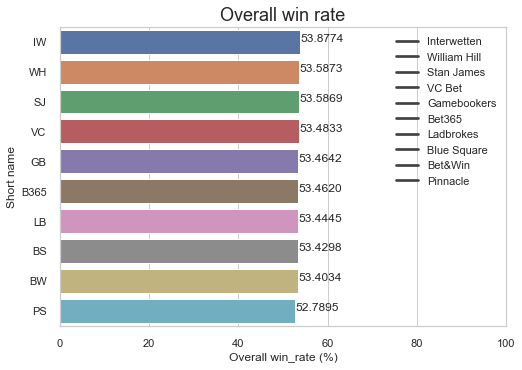

In [429]:
league = companies[['Short name', 'Company name', 'Overall win_rate (%)', 'matches']]
league = league.sort_values(by=['Overall win_rate (%)','matches'], ascending=False)
sns.set_theme(style="whitegrid")
p = sns.barplot(y = 'Short name', x ='Overall win_rate (%)', data=league,orient="h")
show_values(p, "h", space= 0.09)
plt.title('Overall win rate',  fontsize=18) 
plt.legend(league['Company name'])
plt.xlim(0,100)
plt.show()

### Conclusion

- **Interwetten** has the highest and **Pinnacle** has the lowest win rate.
- But after all, these betting companies still have win rate over 50% so it is hard for you to make some money from them.
- Just enjoy football game and stay away from gamblings